<a href="https://colab.research.google.com/github/kartikayv/fraud-detection/blob/main/Accredian.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
import warnings
warnings.filterwarnings('ignore')

# Read the data
df = pd.read_csv('Fraud.csv')

# Display basic information about the dataset
print("Dataset Info:")
print(df.info())
print("\
Missing Values:")
print(df.isnull().sum())
print("\
Basic Statistics:")
print(df.describe())

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2223516 entries, 0 to 2223515
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         float64
 10  isFlaggedFraud  float64
dtypes: float64(7), int64(1), object(3)
memory usage: 186.6+ MB
None
Missing Values:
step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          1
oldbalanceDest    1
newbalanceDest    1
isFraud           1
isFlaggedFraud    1
dtype: int64
Basic Statistics:
               step        amount  oldbalanceOrg  newbalanceOrig  \
count  2.223516e+06  2.223516e+06   2.223516e+06    2.223516e+06   
mean   9.468658e+01  1.6

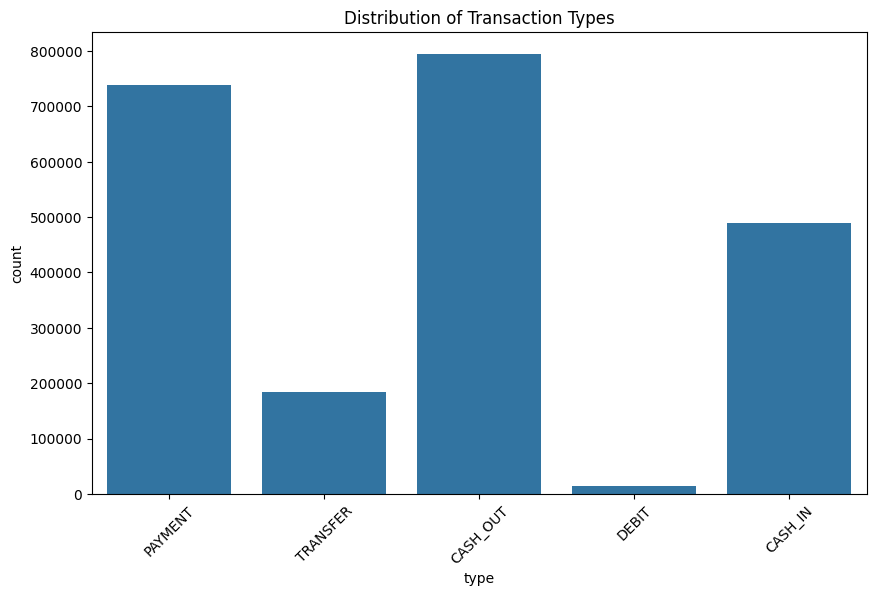

Fraud Distribution:
isFraud
0.0    99.90479
1.0     0.09521
Name: proportion, dtype: float64


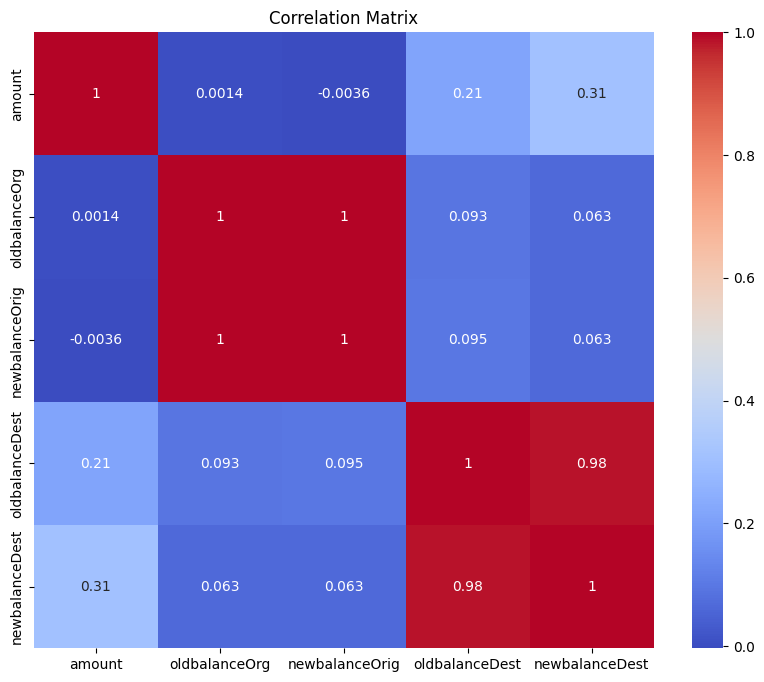

In [2]:
# Check transaction types distribution
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='type')
plt.title('Distribution of Transaction Types')
plt.xticks(rotation=45)
plt.show()

# Check fraud distribution
print("\
Fraud Distribution:")
print(df['isFraud'].value_counts(normalize=True) * 100)

# Check correlation between numerical variables
numerical_cols = ['amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest']
correlation = df[numerical_cols].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [3]:
# Feature Engineering
df['balanceDiff_org'] = df['newbalanceOrig'] - df['oldbalanceOrg']
df['balanceDiff_dest'] = df['newbalanceDest'] - df['oldbalanceDest']

# Print sample of new features
print("Sample of engineered features:")
print(df[['amount', 'balanceDiff_org', 'balanceDiff_dest', 'isFraud']].head())

Sample of engineered features:
     amount  balanceDiff_org  balanceDiff_dest  isFraud
0   9839.64         -9839.64               0.0      0.0
1   1864.28         -1864.28               0.0      0.0
2    181.00          -181.00               0.0      1.0
3    181.00          -181.00          -21182.0      1.0
4  11668.14        -11668.14               0.0      0.0
